In [1]:
from polcal_lib import *

Iter:   0 Lambda:      10.0000 chi2: 5.41e+01  Yes
Iter:   1 Lambda:       0.1000 chi2: 6.70e+03  Yes
Iter:   2 Lambda:       0.0010 chi2: 1.11e+04  Yes
Iter:   3 Lambda:       0.0000 chi2: -6.93e+01  No
Iter:   4 Lambda:       0.0010 chi2: -6.55e+01  No
Iter:   5 Lambda:       0.1000 chi2: 1.10e+00  Yes
Iter:   6 Lambda:       0.0010 chi2: -6.66e+01  No
Iter:   7 Lambda:       0.1000 chi2: -4.22e+00  No
Iter:   8 Lambda:      10.0000 chi2: 2.84e+00  Yes
Iter:   9 Lambda:       0.1000 chi2: -6.68e+00  No
Iter:  10 Lambda:      10.0000 chi2: 2.15e+00  Yes
Iter:  11 Lambda:       0.1000 chi2: -8.40e+00  No
Iter:  12 Lambda:      10.0000 chi2: 1.62e+00  Yes
Iter:  13 Lambda:       0.1000 chi2: -9.66e+00  No
Iter:  14 Lambda:      10.0000 chi2: 1.21e+00  Yes
Iter:  15 Lambda:       0.1000 chi2: -1.06e+01  No
Iter:  16 Lambda:      10.0000 chi2: 9.03e-01  Yes
Iter:  17 Lambda:       0.1000 chi2: -1.12e+01  No
Iter:  18 Lambda:      10.0000 chi2: 6.72e-01  Yes
Iter:  19 Lambda:       0.1000 

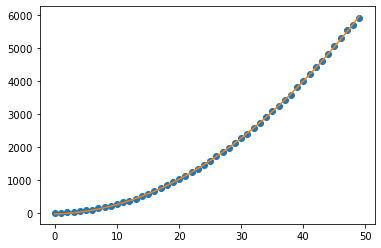

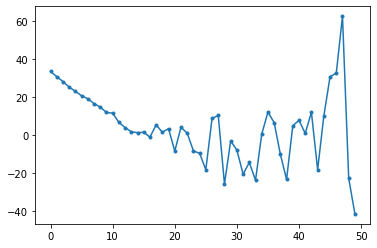

Iter:   0 Lambda:      10.0000 chi2: 5.41e+01  Yes
Iter:   1 Lambda:       0.1000 chi2: 6.74e+03  Yes
Iter:   2 Lambda:       0.0010 chi2: 1.22e+04  Yes
Iter:   3 Lambda:       0.0000 chi2: -6.88e+01  No
Iter:   4 Lambda:       0.0010 chi2: -1.00e+02  No
Iter:   5 Lambda:       0.1000 chi2: -1.00e+02  No
Iter:   6 Lambda:      10.0000 chi2: -1.00e+02  No
Iter:   7 Lambda:    1000.0000 chi2: -1.00e+02  No
Iter:   8 Lambda:  100000.0000 chi2: 8.06e+00  Yes
Iter:   9 Lambda:    1000.0000 chi2: 4.61e-03  Yes
Iter:  10 Lambda:      10.0000 chi2: 3.09e-01  Yes
Iter:  11 Lambda:       0.1000 chi2: -6.31e+00  No
Iter:  12 Lambda:      10.0000 chi2: -1.00e+02  No
Iter:  13 Lambda:    1000.0000 chi2: -1.00e+02  No
Iter:  14 Lambda:  100000.0000 chi2: 1.04e+00  Yes
Iter:  15 Lambda:    1000.0000 chi2: 2.83e-04  Yes
[0.75, 1.7, 2.45] [-31.59534617   4.85938865   2.39344637]


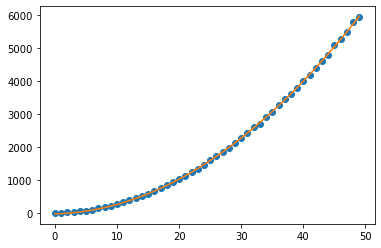

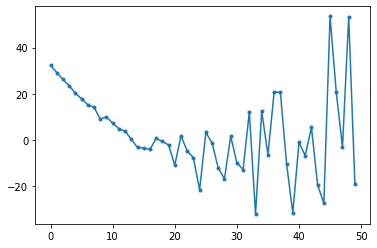

In [2]:
lm_test(cvm=False,istep=100)
lm_test(cvm=True,istep=100)

Iter:   0 Lambda:      10.0000 chi2: 3.21e+01  Yes
Iter:   1 Lambda:       1.0000 chi2: 2.13e+02  Yes
Iter:   2 Lambda:       0.1000 chi2: 4.77e+02  Yes
Iter:   3 Lambda:       0.0100 chi2: 6.04e+02  Yes
Iter:   4 Lambda:       0.0010 chi2: 6.80e+02  Yes
Iter:   5 Lambda:       0.0001 chi2: 4.96e+02  Yes
Iter:   6 Lambda:       0.0000 chi2: 1.26e+02  Yes
Iter:   7 Lambda:       0.0000 chi2: 1.63e+01  Yes
Iter:   8 Lambda:       0.0000 chi2: 1.85e+00  Yes
Iter:   9 Lambda:       0.0000 chi2: 2.06e-01  Yes
Iter:  10 Lambda:       0.0000 chi2: 2.28e-02  Yes
Iter:  11 Lambda:       0.0000 chi2: 2.54e-03  Yes
Iter:  12 Lambda:       0.0000 chi2: 2.82e-04  Yes
[0.75, 1.7, 2.45] [1.8838296  1.48925716 2.46126091]


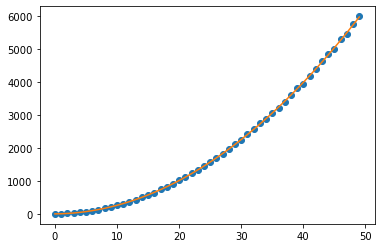

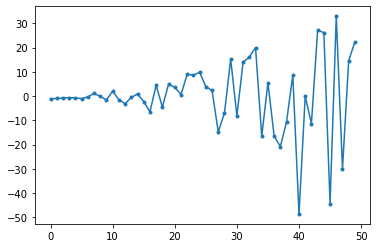

In [12]:
def numerical_der(x,pars,funct):
    
    h = 1e-1
    x_length = len(x)
    pars_length = len(pars)
    jac = np.zeros((x_length,pars_length))
    y, _ = funct(x,pars)
    perturbation = np.copy(pars)

    for i in range(pars_length):
#        if abs(pars[i]) > 1e-9:
#            perturbation[i] = pars[i] * (1. + h)
#            y_d, _ = funct(x,perturbation)
#            perturbation[i] = pars[i] / (1. + h) * (1. - h)
#            y_i, _ = funct(x,perturbation)
#            perturbation[i] = pars[i] / (1. - h)
#        else:
#            perturbation[i] = pars[i] + h
#            y_d, _ = funct(x,perturbation)
#            perturbation[i] = pars[i] - 2*h
#            y_i, _ = funct(x,perturbation)
#            perturbation[i] = pars[i] + h
        perturbation[i] = pars[i] + h
        y_d, _ = funct(x,perturbation)
        perturbation[i] = pars[i] - 2*h
        y_i, _ = funct(x,perturbation)
        perturbation[i] = pars[i] + h
        jac[:,i] = (y_d - y_i)/(2.*h)

    return y,jac

def lm_test(niter=100,njacobian=True):
    def test_func(x,a): 
        x_length = len(x)
        pars_length = len(pars)
        jac = np.zeros((x_length,pars_length))
        y = a[0] + a[1]*x + a[2]*x**2
        jac[:,0] = 1
        jac[:,1] = x
        jac[:,2] = x**2
        return y,jac
    x = np.arange(50)
    pars = [.75,1.70,2.45]
    y,jac = test_func(x,pars)
    y = y + y*np.random.uniform(-1,1,50)*1e-2
    pars = [.70,1.10,0.45]
    #new_pars,yfit = lm(x, y, pars, test_func)
    pars,yfit,_,_ = lm(x, y, pars,test_func,njacobian=njacobian,niter=niter)
    plt.plot(x,y,'o')
    plt.plot(x,yfit)
    print([.75,1.70,2.45],pars)
    plt.show()
    plt.plot(x,y-yfit,'.-')
    plt.show()
lm_test(njacobian=True)

Iter:   0 Lambda:      10.0000 chi2: 5.30e+01  Yes
Iter:   1 Lambda:       1.0000 chi2: 5.04e+02  Yes
Iter:   2 Lambda:       0.1000 chi2: 4.33e+02  Yes
Iter:   3 Lambda:       0.0100 chi2: 2.71e+01  Yes
Iter:   4 Lambda:       0.0010 chi2: 8.78e+00  Yes
Iter:   5 Lambda:       0.0001 chi2: -1.29e+00  No
Iter:   6 Lambda:       0.0100 chi2: -4.75e-01  No
Iter:   7 Lambda:       1.0000 chi2: 7.68e-01  Yes
Iter:   8 Lambda:       0.1000 chi2: -3.03e-01  No
Iter:   9 Lambda:      10.0000 chi2: 1.01e-01  Yes
Iter:  10 Lambda:       1.0000 chi2: 1.43e-01  Yes
Iter:  11 Lambda:       0.1000 chi2: -4.94e-01  No
Iter:  12 Lambda:      10.0000 chi2: 3.94e-02  Yes
Iter:  13 Lambda:       1.0000 chi2: 2.66e-02  Yes
Iter:  14 Lambda:       0.1000 chi2: -5.36e-01  No
Iter:  15 Lambda:      10.0000 chi2: 2.37e-02  Yes
Iter:  16 Lambda:       1.0000 chi2: -3.13e-04  No
Iter:  17 Lambda:     100.0000 chi2: 1.44e-03  Yes
Iter:  18 Lambda:      10.0000 chi2: 1.87e-02  Yes
Iter:  19 Lambda:       1.0000 

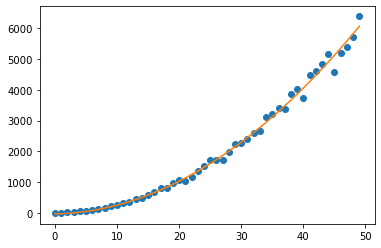

In [4]:

def lm(x, y, pars, funct, ilambda = 10, niter = 20, njacobian = True, weights = 1.0, w_cut=1e-10):

    #Check length of x (can be anything provided it is flatten()
    x_length = len(x)
    pars_length = len(pars) #TODO check if structure - more pragmatical for func calls
    if isinstance(weights, float) : 
        print,"weights is float"
        w = np.ones(x_length)
    else:
        w = np.copy(weights)
        
    free = x_length - pars_length
    if free <= 1:
        print('not enough points')
        return

    # calculate jacobian
    if njacobian:
        #numerically calculate the jacobian
        yfit, jac = numerical_der(x,pars,funct)
    else:
        yfit, jac = funct(x,pars)
    #determine jacobian of merit function
    chi = (y - yfit) * w
    J = np.matmul(chi, jac)
    H = np.matmul(np.transpose(jac), jac)#*w[np.newaxis,:])
    ochi2 = np.sum(chi**2)/free
    loop = 0
    while loop < niter:

        #covar = np.sqrt(np.outer(H.diagonal(),H.diagonal()))
        #H /= covar
        #np.fill_diagonal(H, (1+ilambda))
        np.fill_diagonal(H, H.diagonal()*(1+ilambda))
        
        delta = svd_solve(H, b = J)
        new_pars = pars + delta
        #Hi = svd_solve(H)
        #new_pars = pars + np.matmul(Hi/covar,J)
        yfit, jac = funct(x,new_pars)
        chi = (y - yfit) * w
        chi2 = np.sum(chi**2)/free
        
        if chi2 - ochi2 < 0:
            print('{:<6s}{:>3.0f}{:<8s}{:>12.4f}{:<6s}{:>1.2e}'.format('Iter: ',loop,' Lambda: ',ilambda,' chi2: ',(ochi2 - chi2)*100/chi2),' Yes')
            ilambda *= 0.1
            pars = np.copy(new_pars)
            # calculate jacobian
            if njacobian:
                #numerically calculate the jacobian
                yfit, jac = numerical_der(x,pars,funct)
            else:
                yfit, jac = funct(x,pars)
            #determine jacobian of merit function
            chi = (y - yfit) * w
            J = np.matmul(chi, jac)
            H = np.matmul(np.transpose(jac), jac)#*w[np.newaxis,:])
            if np.abs((ochi2 - chi2)/chi2)*100 < 1e-3:
                break
            ochi2 = np.sum(chi**2)/free

        else:
            print('{:<6s}{:>3.0f}{:<8s}{:>12.4f}{:<6s}{:>1.2e}'.format('Iter: ',loop,' Lambda: ',ilambda,' chi2: ',(ochi2 - chi2)*100/chi2),' No')
            ilambda /= 0.01
        loop += 1

        chi2 = np.sum(chi**2)/free
        Hi = svd_solve(H)
        sigma = np.sqrt(Hi.diagonal())

    return pars, yfit, sigma, chi2

x = np.arange(50)
pars = [.75,1.70,2.45]
y,jac = test_func(x,pars)
y = y + y*np.random.uniform(-1,1,50)*1e-1
pars = [.35,1.10,1.45]
#new_pars,yfit = lm(x, y, pars, test_func)
pars,yfit,_,_ = lm(x, y, pars, test_func,njacobian=True,niter=100)
plt.plot(x,y,'o')
plt.plot(x,yfit)
print([.75,1.70,2.45],pars)
plt.show()

In [5]:

np.sqrt(np.outer(H.diagonal(),H.diagonal()))

NameError: name 'H' is not defined

In [10]:
x = np.arange(50)
pars = [.75,1.70,2.45]
y,jac = test_func(x,pars)
y = y + y*np.random.uniform(-1,1,50)*1e-1
pars = [.35,1.10,1.45]
new_pars,yfit = lm(x, y, pars, test_func)
plt.plot(x,y)
plt.plot(x,yfit)
print(pars,new_pars)
plt.show()

array([ 0.3985669 , -0.69915878, -0.28432178, -0.81654286,  0.41920942,
        0.44233754,  0.22138809, -0.61259343,  0.03655354, -0.65382281,
       -0.85563491,  0.23913447, -0.01150528,  0.20460618, -0.02497571,
       -0.62859833,  0.75659513, -0.43771974, -0.90069587,  0.1918443 ,
        0.44189916,  0.88293722,  0.38513971,  0.46046428, -0.92764129,
        0.25074942,  0.64633889, -0.10477582,  0.15080722,  0.64175933,
        0.24495797,  0.44450447,  0.35471951,  0.90779443,  0.22573621,
       -0.57802427, -0.47734757,  0.15326928, -0.77650311, -0.8835752 ,
        0.7950222 , -0.28208667,  0.35369032,  0.67687698, -0.99456378,
        0.54388566, -0.4732824 ,  0.14319838,  0.1518776 , -0.44679494])